In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("./cleaned_hatecrime.csv")

In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,label
0,CA00-0000015217,2004,2,Alameda,Alameda Co. Sheriff's Department,2,2,Unknown,0,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,None,Daubing of swastika,4.0
1,CA00-0000015122,2004,3,Alameda,Alameda,1,1,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Asian,Race/Ethnicity/Ancestry,Person,None,Threatening letters/flyers/email,4.0
2,CA00-0000015123,2004,3,Alameda,Alameda,1,1,White,1,Simple Assault,Violent Crimes,Service/Gas Station,Anti-Arab,Race/Ethnicity/Ancestry,Person,"Other ( bottle, rocks, spitting)",Verbal slurs,4.0
3,CA00-0000015356,2004,5,Alameda,Alameda,1,0,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Church/Synagogue/Temple,Anti-Catholic,Religion,Religious,None,Graffiti,4.0
4,CA00-0000016280,2004,8,Alameda,Alameda,1,0,Unknown,0,Destruction/Damage/Vandalism,Property Crimes,Church/Synagogue/Temple,Anti-Catholic,Religion,Religious,None,Graffiti,4.0


In [6]:
#df by objects/strings
df_cat = df.iloc[:,np.array(df.dtypes == 'O')].copy()

chi2 = []
for col in df_cat.columns:
    crosstab_res = pd.crosstab(index=df_cat[col], columns=df_cat['label'])
    chi_res = chi2_contingency(crosstab_res)
    chi2.append([col, chi_res[1]])
pd.DataFrame(chi2).sort_values(by=1)

,0,1
1,County,0.000000e+00
2,NCIC,0.000000e+00
12,label,0.000000e+00
3,SuspectsRaceAsAGroup,8.560255e-106
6,MostSeriousLocation,1.619195e-64
7,MostSeriousBias,9.327236e-38
10,WeaponType,1.837576e-25
11,Offensive_Act,4.157315e-14
8,MostSeriousBiasType,1.000756e-13
4,MostSeriousUcr,2.392393e-05


In [7]:
pd.DataFrame(chi2).sort_values(by=1)

,0,1
1,County,0.000000e+00
2,NCIC,0.000000e+00
12,label,0.000000e+00
3,SuspectsRaceAsAGroup,8.560255e-106
6,MostSeriousLocation,1.619195e-64
7,MostSeriousBias,9.327236e-38
10,WeaponType,1.837576e-25
11,Offensive_Act,4.157315e-14
8,MostSeriousBiasType,1.000756e-13
4,MostSeriousUcr,2.392393e-05


In [8]:
df[df['TotalNumberOfVictims'] > 40]

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,label
6594,CA00-0000021594,2008,6,San Francisco,San Francisco,50,50,White,1,Intimidation,Violent Crimes,Government/Public Building,Anti-Lesbian/Gay/Bisexual or Transgender (Mixe...,Sexual Orientation,Person,None,Annoying telephone calls/fax,4.0
14378,CA00-0000030071,2016,9,Santa Clara,Sunnyvale,47,47,White,1,Intimidation,Violent Crimes,School-Elementary/Secondary,Anti-Jewish,Religion,Person,None,Threatening letters/flyers/email,4.0


In [13]:
plt.figure(figsize=(10,10))
gby_year = df.groupby(['County','ClosedYear'])['label'].count()

<Figure size 720x720 with 0 Axes>

In [19]:
df['County'].unique()

array(['Alameda', 'Amador', 'Butte', 'Contra Costa', 'El Dorado',
       'Fresno', 'Humboldt', 'Kern', 'Lake', 'Lassen', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Monterey',
       'Napa', 'Nevada', 'Orange', 'Placer', 'Riverside', 'Sacramento',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Tulare',
       'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Inyo', 'Sutter', 'Colusa',
       'Imperial', 'Mono', 'San Benito', 'Siskiyou', 'Tehama',
       'Calaveras', 'Glenn', 'Kings', 'Del Norte', 'Alpine', 'Plumas'],
      dtype=object)

In [14]:
gby_year

County   ClosedYear
Alameda  2004          38
         2005          39
         2006          33
         2007          43
         2008          52
                       ..
Yuba     2016           2
         2017           7
         2018           5
         2019           1
         2020           2
Name: label, Length: 729, dtype: int64

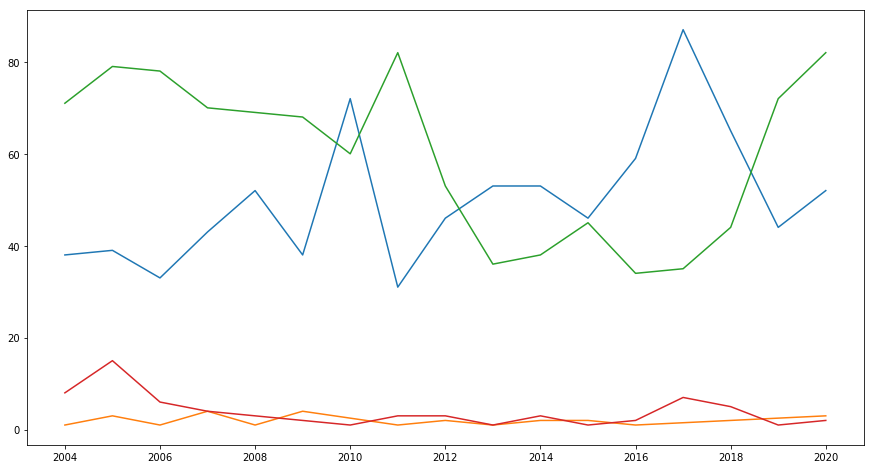

In [26]:
plt.figure(figsize=(15,8))
plt.plot(gby_year['Alameda'])
plt.plot(gby_year['Amador'])
plt.plot(gby_year['Orange'])
plt.plot(gby_year['Yuba'])